In [463]:
import pandas as pd
from sklearn import linear_model
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import random
from mpl_toolkits.mplot3d import Axes3D
from sklearn import preprocessing
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import SGDRegressor


In [464]:
df = pd.read_csv('dataset.csv');

df.dropna(inplace=True);

In [465]:
print(df['Suburb'].unique());

['Abbotsford' 'Airport West' 'Albert Park' 'Alphington' 'Altona'
 'Altona North' 'Armadale' 'Ascot Vale' 'Ashburton' 'Ashwood'
 'Avondale Heights' 'Balaclava' 'Balwyn' 'Balwyn North' 'Bentleigh'
 'Bentleigh East' 'Box Hill' 'Braybrook' 'Brighton' 'Brighton East'
 'Brunswick' 'Brunswick West' 'Bulleen' 'Burwood' 'Camberwell'
 'Canterbury' 'Carlton North' 'Carnegie' 'Caulfield' 'Caulfield North'
 'Caulfield South' 'Chadstone' 'Clifton Hill' 'Coburg' 'Coburg North'
 'Collingwood' 'Doncaster' 'Eaglemont' 'Elsternwick' 'Elwood' 'Essendon'
 'Essendon North' 'Fairfield' 'Fitzroy' 'Fitzroy North' 'Flemington'
 'Footscray' 'Glen Iris' 'Glenroy' 'Gowanbrae' 'Hadfield' 'Hampton'
 'Hampton East' 'Hawthorn' 'Heidelberg Heights' 'Heidelberg West'
 'Hughesdale' 'Ivanhoe' 'Kealba' 'Keilor East' 'Kensington' 'Kew'
 'Kew East' 'Maidstone' 'Malvern' 'Malvern East' 'Maribyrnong' 'Melbourne'
 'Middle Park' 'Mont Albert' 'Moonee Ponds' 'Moorabbin' 'Newport'
 'Niddrie' 'North Melbourne' 'Northcote' 'Oak Park

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0
6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra City Council,-37.80720,144.99410,Northern Metropolitan,4019.0
11,Abbotsford,124 Yarra St,3,h,1876000.0,S,Nelson,7/05/2016,2.5,3067.0,...,2.0,0.0,245.0,210.0,1910.0,Yarra City Council,-37.80240,144.99930,Northern Metropolitan,4019.0
14,Abbotsford,98 Charles St,2,h,1636000.0,S,Nelson,8/10/2016,2.5,3067.0,...,1.0,2.0,256.0,107.0,1890.0,Yarra City Council,-37.80600,144.99540,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34847,Wollert,27 Birchmore Rd,3,h,500000.0,PI,Ray,24/02/2018,25.5,3750.0,...,2.0,2.0,383.0,118.0,2016.0,Whittlesea City Council,-37.61940,145.03951,Northern Metropolitan,2940.0
34849,Wollert,35 Kingscote Wy,3,h,570000.0,SP,RW,24/02/2018,25.5,3750.0,...,2.0,2.0,404.0,158.0,2012.0,Whittlesea City Council,-37.61031,145.03393,Northern Metropolitan,2940.0
34853,Yarraville,29A Murray St,2,h,888000.0,SP,Sweeney,24/02/2018,6.3,3013.0,...,2.0,1.0,98.0,104.0,2018.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0
34854,Yarraville,147A Severn St,2,t,705000.0,S,Jas,24/02/2018,6.3,3013.0,...,1.0,2.0,220.0,120.0,2000.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0


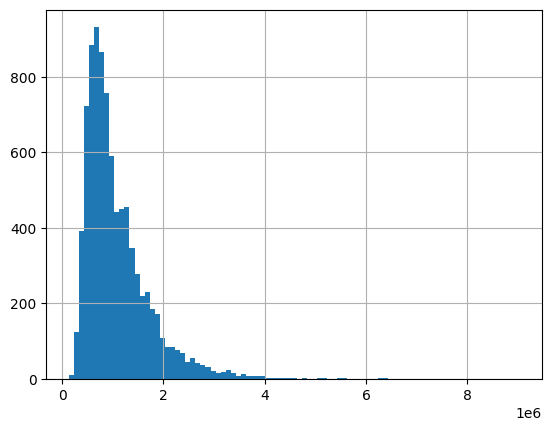

In [466]:
#display(df);
w = 100000;
df["Price"].hist(bins=np.arange(min(df["Price"]), max(df["Price"]) + w, w));


df_city = df#.loc[(df['Suburb'] == 'Carnegie') | (df['Suburb'] == 'Burwood')];

display(df_city);

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,FireRisk
0,Burwood,15 Loudon Rd,5,h,1590000.0,S,Jellis,3/09/2016,11.7,3125.0,...,2.0,661.0,253.0,1940.0,Monash City Council,-37.84800,145.09800,Southern Metropolitan,5678.0,100
1,Burwood,35 McCubbin St,4,h,1890000.0,S,Ray,3/12/2016,11.7,3125.0,...,2.0,1145.0,111.0,1960.0,Monash City Council,-37.85380,145.12700,Southern Metropolitan,5678.0,100
2,Burwood,2/32 McIntyre St,3,u,1022500.0,S,Ray,3/12/2016,11.7,3125.0,...,2.0,265.0,130.0,2000.0,Monash City Council,-37.85160,145.10560,Southern Metropolitan,5678.0,100
3,Burwood,30 Station St,3,h,1755000.0,S,Buxton,4/02/2016,11.7,3125.0,...,1.0,931.0,145.0,1970.0,Monash City Council,-37.85400,145.11950,Southern Metropolitan,5678.0,100
4,Burwood,2 Elgar Rd,3,h,1300000.0,S,Marshall,4/06/2016,11.7,3125.0,...,1.0,667.0,136.0,1950.0,Monash City Council,-37.84890,145.10930,Southern Metropolitan,5678.0,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,Burwood,11 Stephens St,3,h,1388000.0,SP,Buxton,3/03/2018,10.4,3125.0,...,2.0,772.0,112.0,1960.0,Monash City Council,-37.85628,145.10906,Southern Metropolitan,5678.0,100
129,Burwood,5 Kildare St,3,h,1320000.0,S,Lindellas,17/02/2018,10.4,3125.0,...,2.0,595.0,116.0,1950.0,Monash City Council,-37.84579,145.10838,Southern Metropolitan,5678.0,100
130,Burwood,29 Murray Dr,3,h,1217000.0,S,Buxton,17/03/2018,10.4,3125.0,...,1.0,392.0,130.0,1950.0,Monash City Council,-37.84429,145.10199,Southern Metropolitan,5678.0,100
131,Burwood,14 Delany Av,3,h,1725000.0,S,Ray,24/02/2018,10.4,3125.0,...,2.0,766.0,150.0,1960.0,Monash City Council,-37.84900,145.11839,Southern Metropolitan,5678.0,100


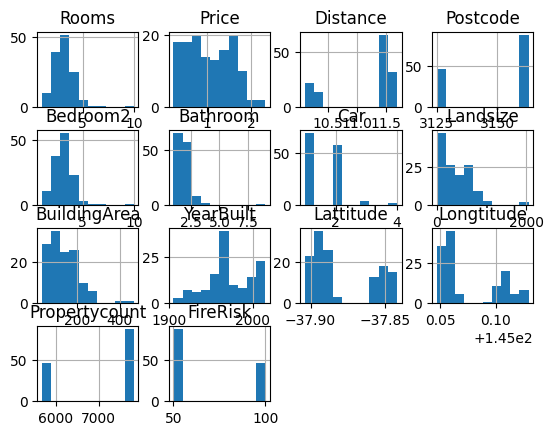

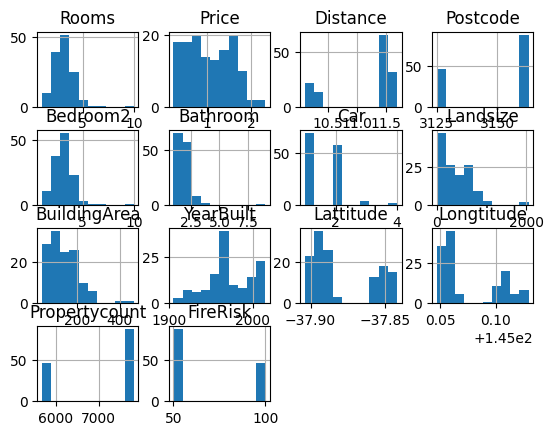

In [467]:
data = {"Suburb": ["Burwood", "Carnegie"],
        "FireRisk": [100, 50]};

join_dataframe = pd.DataFrame(data);

df_merge = df_city.merge(join_dataframe)

df_merge.hist();


Prices = df_merge["Price"];

df_merge.hist();
display(df_merge)


df_XY_train, df_XY_test = train_test_split(df_merge, test_size=0.4);

price_train = df_XY_train["Price"];
price_test = df_XY_test["Price"];


In [468]:
df_X = df_XY_train[['Rooms', 'Car', 'Bedroom2', 'Bathroom', 'Landsize', 'BuildingArea', 'Propertycount', 'YearBuilt', 'Distance']];
df_X_test = df_XY_test[['Rooms', 'Car', 'Bedroom2', 'Bathroom', 'Landsize', 'BuildingArea', 'Propertycount', 'YearBuilt', 'Distance']];


In [469]:

model = linear_model.LinearRegression().fit(df_X, price_train)

test = df_X_test.values;
price_pred = [];
print(model.coef_);
print(test)
for x in test:
    price = model.predict([x]);
    price_pred.append(price);

print("price pred: ", price_pred);
print("price real: ", price_test.values);

print(r2_score(price_test, price_pred));



[-4.76252593e+04  1.09505900e+05  8.20761749e+04 -2.77238607e+04
  1.42997188e+02  4.55562347e+03 -4.19001368e+01 -4.44029224e+03
 -9.77559158e+04]
[[2.000e+00 1.000e+00 2.000e+00 2.000e+00 1.660e+02 1.700e+02 7.822e+03
  2.009e+03 1.140e+01]
 [3.000e+00 1.000e+00 2.000e+00 2.000e+00 8.170e+02 1.300e+02 7.822e+03
  1.925e+03 1.140e+01]
 [3.000e+00 2.000e+00 3.000e+00 1.000e+00 0.000e+00 9.600e+01 7.822e+03
  1.989e+03 1.140e+01]
 [1.000e+00 1.000e+00 1.000e+00 1.000e+00 0.000e+00 4.800e+01 7.822e+03
  1.960e+03 1.140e+01]
 [3.000e+00 1.000e+00 3.000e+00 1.000e+00 6.670e+02 1.360e+02 5.678e+03
  1.950e+03 1.170e+01]
 [4.000e+00 2.000e+00 4.000e+00 2.000e+00 4.380e+02 2.100e+02 5.678e+03
  2.005e+03 1.170e+01]
 [2.000e+00 2.000e+00 3.000e+00 1.000e+00 2.990e+02 1.150e+02 7.822e+03
  1.930e+03 1.140e+01]
 [4.000e+00 2.000e+00 4.000e+00 2.000e+00 6.150e+02 1.930e+02 7.822e+03
  1.920e+03 1.140e+01]
 [4.000e+00 2.000e+00 4.000e+00 2.000e+00 3.990e+02 2.120e+02 5.678e+03
  2.005e+03 1.170e+0

/Users/tudor/Documents/.venv/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/tudor/Documents/.venv/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/tudor/Documents/.venv/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/tudor/Documents/.venv/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/tudor/Documents/.venv/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/tudor/Documen